# GDP vs Consumer Price Inflation of Bhutan

This project is part of the Assignment 4 **(Becoming an Independent Data Scientist)** for Applied Plotting, Charting & Data Representation in Python course offered in Coursera.

This assignment requires to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Thimphu, Thimphu Dzongkhag, Bhutan**, or **Bhutan** more broadly.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Thimphu, Thimphu Dzongkhag, Bhutan** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Data Sources
Data was collected from World Bank
* [GDP Growth (annual %)](https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv) 
* [Inflation of Consumer Prices (annual %)](https://api.worldbank.org/v2/en/indicator/FP.CPI.TOTL.ZG?downloadformat=csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet

In [2]:
# Read the customer price inflation file. Skip first 4 rows
cpi_df = pd.read_csv('../Dataset/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_3052480.csv', skiprows=4)
# Get only the data for Bhutan that is not null
cpi_df = cpi_df[cpi_df['Country Name'] == 'Bhutan'].dropna(axis=1).set_index('Indicator Name')

cpi_df = cpi_df.transpose()
cpi_df = cpi_df[3:]

# Read the GDP file. Skip first 4 rows
gdp_df = pd.read_csv('../Dataset/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_3052565.csv', skiprows=4)
# Get only the data for Bhutan that is not null
gdp_df = gdp_df[gdp_df['Country Name'] == 'Bhutan'].dropna(axis=1).set_index('Indicator Name')
gdp_df = gdp_df.transpose()
gdp_df = gdp_df[3:]
final_df = pd.concat([gdp_df,cpi_df], axis=1)
years = pd.to_numeric(final_df.index)
gdp = pd.to_numeric(final_df['GDP growth (annual %)'])
cpi = pd.to_numeric(final_df['Inflation, consumer prices (annual %)'])
final_df.head()

Indicator Name,GDP growth (annual %),"Inflation, consumer prices (annual %)"
1981,15.122295,9.933142
1982,3.439774,9.904431
1983,10.431016,18.023715
1984,4.556659,7.03282
1985,4.028533,1.877347


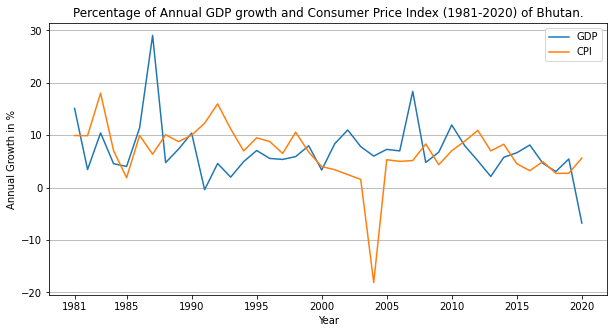

In [3]:
#get_ipython().magic('matplotlib notebook')
%matplotlib inline
plt.figure(figsize=(10,5)) 
plt.plot(np.arange(len(gdp)),gdp, label="GDP") 
plt.plot(np.arange(len(cpi)),cpi,label="CPI")  

tick=[0,4,9,14,19,24,29,34,39]
plt.xticks(tick,[1981,1985,1990,1995,2000,2005,2010,2015,2020]) 
ax=plt.gca() 
#ax.axis([-2,367,-42,42]) 
#plt.gca().fill_between(np.arange(0,365),min_temp_05_14, max_temp_05_14, facecolor='grey',alpha=0.25) 
plt.title('Percentage of Annual GDP growth and Consumer Price Index (1981-2020) of Bhutan.') 
plt.xlabel('Year')
plt.ylabel('Annual Growth in %')
plt.grid(axis='y')
plt.legend(loc=0) 
plt.show()

## Brief Analysis on the Plot

This visualization was concerned with answering the question of how the change percentages of the GDP and CPI of Bhutan have changed over the last 30 years. The Data was collected from the world bank website in CSV format. The CSV file contained data from the whole world. The data of Bhutan was selected and the information from 1981 was selected because the details before 1981 were empty.

The plot indicates that the GDP and CPI of Bhutan have remained mostly between 0 to 10 percent. We could see a few spikes. After searching online on that information I could find the following information:
1. GDP in 1987 could have increased as Bhutan opened up to the world with receiving huge grants from Japan and development activity increased.
2. CPI decrease in 2004. New custom and tax laws were implemented.
3. GDP increase in 2007. Tala Hydropower was commissioned and thus, export of Bhutan increased.